In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
cat4 = cv2.imread("C:/2-compVision/PetImages/Cat/4.jpg")
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [3]:
cat4.shape

(375, 500, 3)

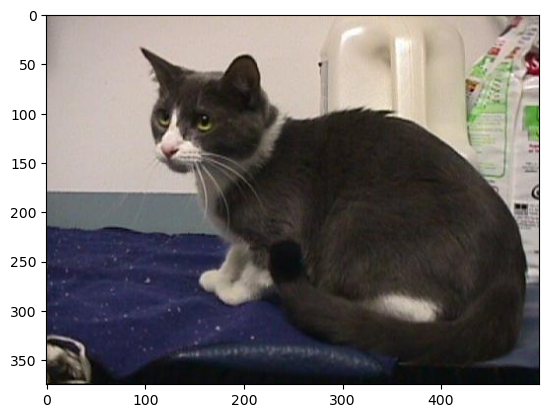

In [4]:
plt.imshow(cat4)

In [6]:
dog2 = cv2.imread("C:/2-compVision/PetImages/Dog/2.jpg")
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [7]:
dog2.shape

(199, 188, 3)

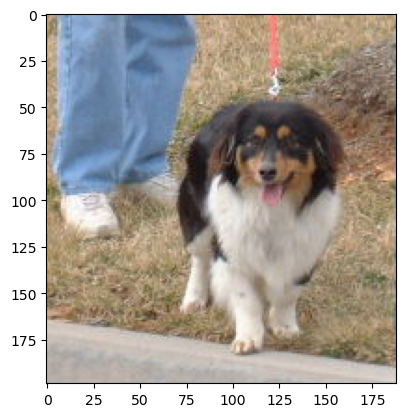

In [8]:
plt.imshow(dog2)

##### Image Manipulation:
    Image manipulation refers to the process of performing various operations on images, such as resizing, rotation, mirroring, and enhancement, typically for lightweight image processing purposes and optimized for speed.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
image_gen = ImageDataGenerator(
    rotation_range=30,        # Randomly rotate images by 30 degrees
    width_shift_range=0.1,    # Randomly shift images horizontally by 10% of the width
    height_shift_range=0.1,   # Randomly shift images vertically by 10% of the height
    rescale=1/255,            # Rescale pixel values to the range [0, 1]
    shear_range=0.2,          # Apply shear transformations with a shear intensity of 0.2
    zoom_range=0.2,           # Randomly zoom in/out on images by 20%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in newly created pixels with the nearest pixel value
)

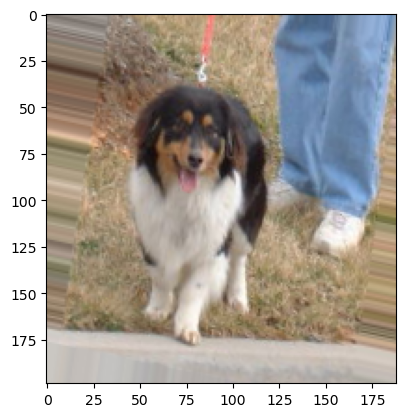

In [18]:
plt.imshow(image_gen.random_transform(dog2))

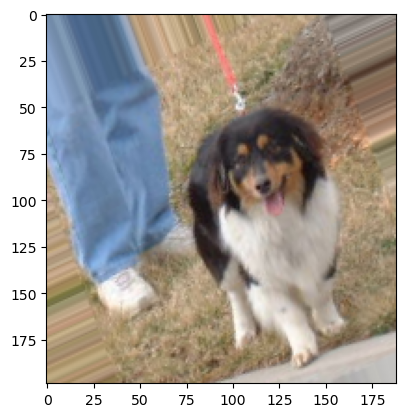

In [19]:
plt.imshow(image_gen.random_transform(dog2))

In [24]:
image_gen.flow_from_directory("C:/2-compVision/CAT_DOGS/train")

Found 0 images belonging to 0 classes.


In [25]:
image_gen.flow_from_directory("C:/2-compVision/CAT_DOGS/test")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/2-compVision/CAT_DOGS/test'

In [ ]:
##### Resizing Images: 
Let's have keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [ ]:
#width,height,channel
image_shape=(150,150,3)

##### Creating Model

In [28]:
from keras.models import Sequential
from keras.layers import Activation,Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [29]:
model = Sequential()  # Initialize a sequential model

# Add a convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and input shape of 150x150x3
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  # Add a max pooling layer with a 2x2 pool size

# Add a second convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  # Add another max pooling layer with a 2x2 pool size

# Add a third convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  # Add another max pooling layer with a 2x2 pool size

model.add(Flatten())  # Flatten the 3D output to 1D for the fully connected layers

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.add(Dense(128))                # Add a dense (fully connected) layer with 128 neurons
model.add(Activation('relu'))        # Apply the ReLU activation function to introduce non-linearity

model.add(Dropout(0.5))              # Add a dropout layer to prevent overfitting by dropping 50% of the neurons
model.add(Dense(1))                  # Add another dense layer with a single neuron (output layer)
model.add(Activation('sigmoid'))     # Apply the sigmoid activation function to get output probabilities

model.compile(
    loss='binary_crossentropy',      # Use binary cross-entropy as the loss function for binary classification
    optimizer='adam',                # Use the Adam optimizer for training
    metrics=['accuracy']             # Track accuracy as a performance metric
)

model.summary()                      # Print a summary of the model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,424,835 (9.25 MB)

 Trainable params: 2,424,835 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory("c:2-compVision/CATS_DOGS/train",
                                                target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')


In [ ]:
batch_size = 16

test_image_gen = image_gen.flow_from_directory("c:2-compVision/CATS_DOGS/test",
                                                target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')


In [ ]:
train_image_gen.class_indices

In [ ]:
import warnings
warnings.filterwarning('ignore')

In [ ]:
results = model.fit_generator(train_image_gen,epochs=10,steps_per_epoch=15,validation_data=test_image_gen,validation_steps=12)

In [ ]:
#Evaluating Model
results.history['acc']

In [ ]:
plt.plot(results.history['acc'])